In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv("./movies_metadata.csv")

C:\Users\Jooeun Kim\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
data.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [4]:
# "장르" column 정리
genres = []
for list_ in data["genres"].apply(lambda x: eval(x)):
    genres.extend(list_) if len(list_) > 0 else genres.append(np.nan)
    
# Unique Genre-Id Tuple
genres_unique = [set(tuple(x.items()) if type(x) == dict else None for x in genres)]

In [5]:
# retain genre by name

genre_byname = data["genres"].apply(lambda x: [*map(lambda y: y["name"], eval(x))] if len(eval(x)) > 0 else np.nan)

In [6]:
# generate new_data with necessary data

new_data = pd.DataFrame(columns=["original_title","overview","genres"])

for i in new_data.columns:
  new_data[i] = data[i].copy()

new_data["genres"] = genre_byname

new_data = new_data.dropna().reset_index(drop=True)

In [7]:
genres_unique

[{(('id', 10402), ('name', 'Music')),
  (('id', 10749), ('name', 'Romance')),
  (('id', 10751), ('name', 'Family')),
  (('id', 10752), ('name', 'War')),
  (('id', 10769), ('name', 'Foreign')),
  (('id', 10770), ('name', 'TV Movie')),
  (('id', 12), ('name', 'Adventure')),
  (('id', 14), ('name', 'Fantasy')),
  (('id', 16), ('name', 'Animation')),
  (('id', 18), ('name', 'Drama')),
  (('id', 27), ('name', 'Horror')),
  (('id', 28), ('name', 'Action')),
  (('id', 35), ('name', 'Comedy')),
  (('id', 36), ('name', 'History')),
  (('id', 37), ('name', 'Western')),
  (('id', 53), ('name', 'Thriller')),
  (('id', 80), ('name', 'Crime')),
  (('id', 878), ('name', 'Science Fiction')),
  (('id', 9648), ('name', 'Mystery')),
  (('id', 99), ('name', 'Documentary')),
  (('name', 'Aniplex'), ('id', 2883)),
  (('name', 'BROSTA TV'), ('id', 7760)),
  (('name', 'Carousel Productions'), ('id', 11176)),
  (('name', 'GoHands'), ('id', 7759)),
  (('name', 'Mardock Scramble Production Committee'), ('id', 77

In [8]:
# extract genres by single list (set(all_genres)=unique set of genres)
all_genres = []
for i in new_data["genres"]:
  all_genres.extend(i)

In [9]:
# exclude insignificant genres
exclude_list = []
for i in set(all_genres):
  print("Genre: ",i, "\nCount: ",all_genres.count(i))
  print("-"*15)
  if all_genres.count(i) == 1:
    exclude_list.append(i)

exclude_list.extend(["TV Movie","Foreign", "Animation"])

Genre:  BROSTA TV 
Count:  1
---------------
Genre:  The Cartel 
Count:  1
---------------
Genre:  War 
Count:  1310
---------------
Genre:  Vision View Entertainment 
Count:  1
---------------
Genre:  Crime 
Count:  4269
---------------
Genre:  Thriller 
Count:  7586
---------------
Genre:  GoHands 
Count:  1
---------------
Genre:  Foreign 
Count:  1599
---------------
Genre:  Rogue State 
Count:  1
---------------
Genre:  Mystery 
Count:  2451
---------------
Genre:  Science Fiction 
Count:  3028
---------------
Genre:  Mardock Scramble Production Committee 
Count:  1
---------------
Genre:  Western 
Count:  1035
---------------
Genre:  Carousel Productions 
Count:  1
---------------
Genre:  Fantasy 
Count:  2290
---------------
Genre:  Animation 
Count:  1920
---------------
Genre:  Action 
Count:  6565
---------------
Genre:  Odyssey Media 
Count:  1
---------------
Genre:  Adventure 
Count:  3470
---------------
Genre:  Telescene Film Group Productions 
Count:  1
---------------


In [10]:
genres_excluded = []
for i in new_data["genres"]:
  genres_excluded.append(list(set(i) - set(exclude_list)))

In [11]:
new_data["genres"] = genres_excluded

In [12]:
new_data["genres"].head(10)

0                      [Comedy, Family]
1          [Adventure, Fantasy, Family]
2                     [Comedy, Romance]
3              [Comedy, Drama, Romance]
4                              [Comedy]
5      [Crime, Drama, Action, Thriller]
6                     [Comedy, Romance]
7    [Drama, Adventure, Family, Action]
8         [Adventure, Action, Thriller]
9         [Adventure, Action, Thriller]
Name: genres, dtype: object

In [13]:
exclude_list

['BROSTA TV',
 'The Cartel',
 'Vision View Entertainment',
 'GoHands',
 'Rogue State',
 'Mardock Scramble Production Committee',
 'Carousel Productions',
 'Odyssey Media',
 'Telescene Film Group Productions',
 'Pulser Productions',
 'Aniplex',
 'Sentai Filmworks',
 'TV Movie',
 'Foreign',
 'Animation']

In [14]:
# 0 장르인 항목 제거
temp = []
for e,i in enumerate(new_data["genres"]):
    if len(i) == 0:
        temp.append(e)

new_data = new_data.drop(temp).reset_index(drop = True)

In [15]:
# 소문자 전환
new_data["overview"] = new_data["overview"].apply(lambda x: x.lower())

In [16]:
# delete url links & drop "No overview"
import re

row_drop = []
for e,i in enumerate(new_data["overview"]):
    new_data["overview"][e] = re.sub('(https?://)[^ ]+','', i)
    new_data["overview"][e] = re.sub('[^ ]+(www.)+[^ ]+','', i)
    new_data["overview"][e] = re.sub('hancinema.net[^ ]+','', i)
    new_data["overview"][e] = re.sub('(mc)[^ ]+','',i)
    if "No overview" in i or "No Overview" in i or "no overview" in i:
        row_drop.append(e)
        
new_data = new_data.drop(row_drop)

In [17]:
# tokenize

import nltk
nltk.download('punkt')

from nltk.tokenize import sent_tokenize, word_tokenize

ov_token = new_data["overview"].apply(word_tokenize)


# Use RegX

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
ov_token_reg = new_data["overview"].apply(tokenizer.tokenize)

[nltk_data] Downloading package punkt to C:\Users\Jooeun
[nltk_data]     Kim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords = list(set(stopwords.words('english')))

stopWords.extend(["s","movie","movies","film","films","meet",
                  "mr","ms","mrs"])

[nltk_data] Downloading package stopwords to C:\Users\Jooeun
[nltk_data]     Kim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# exclude stopwords

ov_token_sw = []
for word_list in ov_token_reg:
    ov_token_sw.append([word for word in word_list if word not in stopWords])

In [21]:
pd.Series(ov_token_sw)

0        [led, woody, andy, toys, live, happily, room, ...
1        [siblings, judy, peter, discover, enchanted, b...
2        [family, wedding, reignites, ancient, feud, ne...
3        [cheated, mistreated, stepped, women, holding,...
4        [george, banks, recovered, daughter, wedding, ...
                               ...                        
41931    [year, 3000, ad, world, dangerous, women, bani...
41932    [yet, another, version, classic, epic, enough,...
41933                        [rising, falling, man, woman]
41934    [artist, struggles, finish, work, storyline, c...
41935    [one, hits, goes, wrong, professional, assassi...
Length: 41936, dtype: object

In [40]:
# Stemming 

import nltk
stemmer = nltk.stem.porter.PorterStemmer()

train_X_raw = []

for i in ov_token_sw:
    train_X_raw.append([stemmer.stem(words) for words in i])

In [41]:
train_X_raw = pd.Series(train_X_raw)

In [24]:
whole=[]
for num,i in enumerate(train_X_raw):
    whole+=i
    if num%10000==0:
        print(num)
from collections import Counter
counter=Counter(whole)
L=dict(counter)
def f(x):
    return x[1]
D = sorted(L.items(),key=f,reverse=True)
stops = dict(D[:9800]).keys() 

0
10000
20000
30000
40000


In [42]:
# exclusion
train_X_clean = train_X_raw.apply(lambda i: [word for word in i if word in stops])

word_exclude_list = ["one","two","three","four","five",
                     "six","seven","eight","nine","ten",
                     "much","would","ever","whose","also",
                     "seem","jame","john","david","peter","michael", 
                     "mari", "ann", "lee", "u", "ii", "sam", 
                    "els", "lisa", 'charl', 'linda', 'daniel', 
                     'steven', 'steve', 'joe', 'kevin', 'william', 
                     'harri', 'richard', 'elizabeth', 'martin', 
                     'jim', 'anna']

train_X_final = train_X_clean.apply(lambda i: [word for word in i if word not in word_exclude_list])

(array([  63.,  195.,  719., 1609., 2335., 2714., 2731., 2353., 2185.,
        2015., 1928., 1716., 1738., 1745., 1705., 1673., 1579., 1569.,
        1385., 1166., 1032.,  858.,  720.,  625.,  607.,  546.,  474.,
         463.,  384.,  410.,  344.,  285.,  319.,  239.,  238.,  201.,
         186.,  167.,  148.,  137.,  112.,   91.,   78.,   48.,   32.,
          23.,   21.,   10.,    9.,    6.]),
 array([  0.  ,   2.02,   4.04,   6.06,   8.08,  10.1 ,  12.12,  14.14,
         16.16,  18.18,  20.2 ,  22.22,  24.24,  26.26,  28.28,  30.3 ,
         32.32,  34.34,  36.36,  38.38,  40.4 ,  42.42,  44.44,  46.46,
         48.48,  50.5 ,  52.52,  54.54,  56.56,  58.58,  60.6 ,  62.62,
         64.64,  66.66,  68.68,  70.7 ,  72.72,  74.74,  76.76,  78.78,
         80.8 ,  82.82,  84.84,  86.86,  88.88,  90.9 ,  92.92,  94.94,
         96.96,  98.98, 101.  ]),
 <a list of 50 Patch objects>)

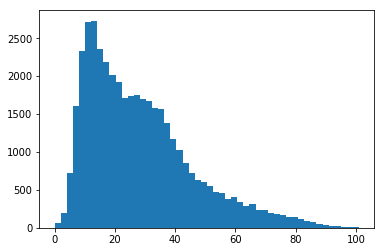

In [44]:
plt.hist(train_X_final.apply(len), bins=50)

In [48]:
train_X_final

0        [led, woodi, andi, toy, live, happili, room, a...
1        [sibl, judi, discov, enchant, board, game, ope...
2        [famili, wed, reignit, ancient, feud, next, do...
3        [cheat, mistreat, step, women, hold, breath, w...
4        [georg, bank, recov, daughter, wed, receiv, ne...
                               ...                        
41931    [year, ad, world, danger, women, banish, remot...
41932    [yet, anoth, version, classic, epic, enough, v...
41933                             [rise, fall, man, woman]
41934    [artist, struggl, finish, work, storylin, cult...
41935    [hit, goe, wrong, profession, assassin, end, s...
Length: 41936, dtype: object

In [53]:
new_data = new_data.reset_index(drop=True)

In [55]:
new_data['tokens'] = train_X_final
new_data

,original_title,overview,genres,tokens
0,Toy Story,"led by woody, andy's toys live happily in his ...","[Comedy, Family]","[led, woodi, andi, toy, live, happili, room, a..."
1,Jumanji,when siblings judy and peter discover an encha...,"[Adventure, Fantasy, Family]","[sibl, judi, discov, enchant, board, game, ope..."
2,Grumpier Old Men,a family wedding reignites the ancient feud be...,"[Comedy, Romance]","[famili, wed, reignit, ancient, feud, next, do..."
3,Waiting to Exhale,"cheated on, mistreated and stepped on, the wom...","[Comedy, Drama, Romance]","[cheat, mistreat, step, women, hold, breath, w..."
4,Father of the Bride Part II,just when george banks has recovered from his ...,[Comedy],"[georg, bank, recov, daughter, wed, receiv, ne..."
...,...,...,...,...
41931,Caged Heat 3000,it's the year 3000 ad. the world's most danger...,[Science Fiction],"[year, ad, world, danger, women, banish, remot..."
41932,Robin Hood,"yet another version of the classic epic, with ...","[Drama, Action, Romance]","[yet, anoth, version, classic, epic, enough, v..."
41933,رگ خواب,rising and falling between a man and woman.,"[Drama, Family]","[rise, fall, man, woman]"
41934,Siglo ng Pagluluwal,an artist struggles to finish his work while a...,[Drama],"[artist, struggl, finish, work, storylin, cult..."


In [57]:
new_data.to_csv('C:/Users/Jooeun Kim/Desktop/NLP/data_tokenized.csv',index = False)

In [70]:
genres = []
n = 0
for i in new_data['genres']:
    for item in i:
        if item not in genres:
            genres.append(item)

In [72]:
len(genres)

17

In [73]:
for gen in genres:
    new_data[gen] = [0] * len(new_data)

In [74]:
new_data

,original_title,overview,genres,tokens,Comedy,Family,Adventure,Fantasy,Romance,Drama,...,Action,Thriller,Horror,History,Science Fiction,Mystery,War,Music,Documentary,Western
0,Toy Story,"led by woody, andy's toys live happily in his ...","[Comedy, Family]","[led, woodi, andi, toy, live, happili, room, a...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Jumanji,when siblings judy and peter discover an encha...,"[Adventure, Fantasy, Family]","[sibl, judi, discov, enchant, board, game, ope...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Grumpier Old Men,a family wedding reignites the ancient feud be...,"[Comedy, Romance]","[famili, wed, reignit, ancient, feud, next, do...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Waiting to Exhale,"cheated on, mistreated and stepped on, the wom...","[Comedy, Drama, Romance]","[cheat, mistreat, step, women, hold, breath, w...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Father of the Bride Part II,just when george banks has recovered from his ...,[Comedy],"[georg, bank, recov, daughter, wed, receiv, ne...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41931,Caged Heat 3000,it's the year 3000 ad. the world's most danger...,[Science Fiction],"[year, ad, world, danger, women, banish, remot...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41932,Robin Hood,"yet another version of the classic epic, with ...","[Drama, Action, Romance]","[yet, anoth, version, classic, epic, enough, v...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41933,رگ خواب,rising and falling between a man and woman.,"[Drama, Family]","[rise, fall, man, woman]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41934,Siglo ng Pagluluwal,an artist struggles to finish his work while a...,[Drama],"[artist, struggl, finish, work, storylin, cult...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
n = 0
for gen in genres:
    for i in new_data['genres']:
        if gen in i:
            new_data.loc[n,[gen]] = 1
        n += 1
    print(n == len(new_data))
    n = 0

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [84]:
new_data

,original_title,overview,genres,tokens,Comedy,Family,Adventure,Fantasy,Romance,Drama,...,Action,Thriller,Horror,History,Science Fiction,Mystery,War,Music,Documentary,Western
0,Toy Story,"led by woody, andy's toys live happily in his ...","[Comedy, Family]","[led, woodi, andi, toy, live, happili, room, a...",1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Jumanji,when siblings judy and peter discover an encha...,"[Adventure, Fantasy, Family]","[sibl, judi, discov, enchant, board, game, ope...",0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Grumpier Old Men,a family wedding reignites the ancient feud be...,"[Comedy, Romance]","[famili, wed, reignit, ancient, feud, next, do...",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Waiting to Exhale,"cheated on, mistreated and stepped on, the wom...","[Comedy, Drama, Romance]","[cheat, mistreat, step, women, hold, breath, w...",1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Father of the Bride Part II,just when george banks has recovered from his ...,[Comedy],"[georg, bank, recov, daughter, wed, receiv, ne...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41931,Caged Heat 3000,it's the year 3000 ad. the world's most danger...,[Science Fiction],"[year, ad, world, danger, women, banish, remot...",0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
41932,Robin Hood,"yet another version of the classic epic, with ...","[Drama, Action, Romance]","[yet, anoth, version, classic, epic, enough, v...",0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
41933,رگ خواب,rising and falling between a man and woman.,"[Drama, Family]","[rise, fall, man, woman]",0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
41934,Siglo ng Pagluluwal,an artist struggles to finish his work while a...,[Drama],"[artist, struggl, finish, work, storylin, cult...",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [107]:
vectors = []
n = 0
for i in range(len(new_data)):
    vectors.append(list(new_data.iloc[n][4:]))
    n += 1

In [110]:
new_data['vec'] = vectors

In [111]:
new_data

,original_title,overview,genres,tokens,Comedy,Family,Adventure,Fantasy,Romance,Drama,...,Thriller,Horror,History,Science Fiction,Mystery,War,Music,Documentary,Western,vec
0,Toy Story,"led by woody, andy's toys live happily in his ...","[Comedy, Family]","[led, woodi, andi, toy, live, happili, room, a...",1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Jumanji,when siblings judy and peter discover an encha...,"[Adventure, Fantasy, Family]","[sibl, judi, discov, enchant, board, game, ope...",0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,"[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Grumpier Old Men,a family wedding reignites the ancient feud be...,"[Comedy, Romance]","[famili, wed, reignit, ancient, feud, next, do...",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Waiting to Exhale,"cheated on, mistreated and stepped on, the wom...","[Comedy, Drama, Romance]","[cheat, mistreat, step, women, hold, breath, w...",1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,Father of the Bride Part II,just when george banks has recovered from his ...,[Comedy],"[georg, bank, recov, daughter, wed, receiv, ne...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41931,Caged Heat 3000,it's the year 3000 ad. the world's most danger...,[Science Fiction],"[year, ad, world, danger, women, banish, remot...",0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
41932,Robin Hood,"yet another version of the classic epic, with ...","[Drama, Action, Romance]","[yet, anoth, version, classic, epic, enough, v...",0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
41933,رگ خواب,rising and falling between a man and woman.,"[Drama, Family]","[rise, fall, man, woman]",0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
41934,Siglo ng Pagluluwal,an artist struggles to finish his work while a...,[Drama],"[artist, struggl, finish, work, storylin, cult...",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [112]:
new_data.to_csv('C:/Users/Jooeun Kim/Desktop/NLP/data_vectorized.csv',index = False)

In [117]:
tok = new_data['tokens']

In [118]:
from gensim.models import Word2Vec

In [128]:
model = Word2Vec(sentences=tok, size=40, window=5, min_count=15, workers=4, sg=0)

In [134]:
model_result = model.wv.most_similar("")
print(model_result)

[('asleep', 0.7424589395523071), ('spell', 0.6656028032302856), ('charm', 0.6404204368591309), ('romanc', 0.602245569229126), ('marriag', 0.5997248888015747), ('extramarit', 0.5896084308624268), ('beauti', 0.582029402256012), ('grace', 0.5818518400192261), ('passion', 0.5814216732978821), ('affect', 0.567459225654602)]


In [138]:
print(model['book'])

[-1.0426205  -0.36504593  0.9940816   0.5663641  -0.3077413   0.8312158
 -2.0970612   0.04535946  0.9890068   0.57963246 -0.5329573  -0.06481958
 -0.08292375  1.4686434   1.9617869   0.60428154 -0.88630456  0.55069304
 -0.37752697  2.421437   -0.01909178 -1.1442904  -1.7636342  -0.7428691
  0.9997803  -0.24211743 -0.8053038  -0.05872065  0.59382576 -0.60451466
  0.52122146  0.86718845  0.94572103  0.7821041   0.3332889  -2.2921882
 -0.77044094  0.03524181 -1.5097208   0.7323337 ]


C:\Users\Jooeun Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(array([  63.,  195.,  719., 1609., 2335., 2714., 2731., 2353., 2185.,
        2015., 1928., 1716., 1738., 1745., 1705., 1673., 1579., 1569.,
        1385., 1166., 1032.,  858.,  720.,  625.,  607.,  546.,  474.,
         463.,  384.,  410.,  344.,  285.,  319.,  239.,  238.,  201.,
         186.,  167.,  148.,  137.,  112.,   91.,   78.,   48.,   32.,
          23.,   21.,   10.,    9.,    6.]),
 array([  0.  ,   2.02,   4.04,   6.06,   8.08,  10.1 ,  12.12,  14.14,
         16.16,  18.18,  20.2 ,  22.22,  24.24,  26.26,  28.28,  30.3 ,
         32.32,  34.34,  36.36,  38.38,  40.4 ,  42.42,  44.44,  46.46,
         48.48,  50.5 ,  52.52,  54.54,  56.56,  58.58,  60.6 ,  62.62,
         64.64,  66.66,  68.68,  70.7 ,  72.72,  74.74,  76.76,  78.78,
         80.8 ,  82.82,  84.84,  86.86,  88.88,  90.9 ,  92.92,  94.94,
         96.96,  98.98, 101.  ]),
 <a list of 50 Patch objects>)

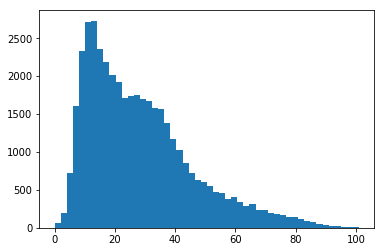

In [139]:
plt.hist([len(s) for s in train_X_final], bins=50)

In [143]:
train_X_final

0        [led, woodi, andi, toy, live, happili, room, a...
1        [sibl, judi, discov, enchant, board, game, ope...
2        [famili, wed, reignit, ancient, feud, next, do...
3        [cheat, mistreat, step, women, hold, breath, w...
4        [georg, bank, recov, daughter, wed, receiv, ne...
                               ...                        
41931    [year, ad, world, danger, women, banish, remot...
41932    [yet, anoth, version, classic, epic, enough, v...
41933                             [rise, fall, man, woman]
41934    [artist, struggl, finish, work, storylin, cult...
41935    [hit, goe, wrong, profession, assassin, end, s...
Length: 41936, dtype: object

In [141]:
new_data

,original_title,overview,genres,tokens,Comedy,Family,Adventure,Fantasy,Romance,Drama,...,Thriller,Horror,History,Science Fiction,Mystery,War,Music,Documentary,Western,vec
0,Toy Story,"led by woody, andy's toys live happily in his ...","[Comedy, Family]","[led, woodi, andi, toy, live, happili, room, a...",1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Jumanji,when siblings judy and peter discover an encha...,"[Adventure, Fantasy, Family]","[sibl, judi, discov, enchant, board, game, ope...",0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,"[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Grumpier Old Men,a family wedding reignites the ancient feud be...,"[Comedy, Romance]","[famili, wed, reignit, ancient, feud, next, do...",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Waiting to Exhale,"cheated on, mistreated and stepped on, the wom...","[Comedy, Drama, Romance]","[cheat, mistreat, step, women, hold, breath, w...",1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,Father of the Bride Part II,just when george banks has recovered from his ...,[Comedy],"[georg, bank, recov, daughter, wed, receiv, ne...",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41931,Caged Heat 3000,it's the year 3000 ad. the world's most danger...,[Science Fiction],"[year, ad, world, danger, women, banish, remot...",0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
41932,Robin Hood,"yet another version of the classic epic, with ...","[Drama, Action, Romance]","[yet, anoth, version, classic, epic, enough, v...",0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
41933,رگ خواب,rising and falling between a man and woman.,"[Drama, Family]","[rise, fall, man, woman]",0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
41934,Siglo ng Pagluluwal,an artist struggles to finish his work while a...,[Drama],"[artist, struggl, finish, work, storylin, cult...",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
